# Dimensionality Reduction


An alternative approach to feature selection for dimensionality reduction is feature extraction. <br>
Data compression is an important topic in ML. here we will analyze: <br>


1.   PCA(principal component analysis) for unsupervised data compression.
2.   LDA (Linear discriminant analysis) as a supervised dimensionality reduction technique for maximizing class separability.
1.   Overview of nonlinear dimensionality reduction techniques






<H1> PCA <br>
<h6> An unsupervised linear transformation technique that is widely used across different fiels, most prominently for feature extraction and dimensionality reduction. <br>
PCA aim to find directions of maximum variance in high dimensional data and projects the data of the new subspace with equal or fewer dimensions than the original one.<br>
The orthogonal axes(PC) of the new subspace can be interpreted as the direction of maximum variance given the constraint that the new feature axes are orthogonal to each other.

Using a pca construct a dxk dimensional transformation matrix, W, this allows us to map a vector of the features of the training example, x, onto a new k-dimensional feature subspace with fewer dimensions then the original d-dimensional feature space. <br>
The result of transforming the original d-dimensional data onto this new k-dimensional subspace is that the first principal component have the largest possible variance. All consequent PC will have the largest variance given the constraint that these component are uncorrelated to the other PC, even if the input features are correlated, the resulting PC will be mutually uncorrelated. <br>
PCA is highly sensitive to data scaling, so we need first standardize the features.

PCA Steps


1.   Standardize the d-dimensional dataset
1.   Construc covariance matrix(which tells us which features are correlated), the covariance matrix explain the spread(variance) and the directions(covariance).
1.   Decompose the covariance matrix into its eigenvectors (a vector which indicate the directions(covariance) of larger spread) and eigenvalues (a number which indicate its magnitude).
1.   Sort the eigenvalues by decreasing order to rank the corresponding eigenvectors (the first eigenvectors will have the largest spread(variance), the second have the second largest spread ....).
2.   Select k eigen vectors which correspond to the k largest eigenvalues, k is the dimensionality of new feature subspace.
2.   Construct a projection matrix, W (dxk), we started from matrix dxd, now we are dxk, d = original features, k = wanted features.
2.   Transform the d-dimensional input dataset, X, using the projection matrix, W to obtain the new k-dimensional feature subspace.




In [20]:
import pandas as pd
#Database
df_wine = pd.read_csv(
'https://archive.ics.uci.edu/ml/'
'machine-learning-databases/wine/wine.data',
header=None
)

In [21]:
#Split
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y, random_state=0)

In [22]:
#1) Standardalizzazione
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
#2) Covariance matrix
import numpy as np
cov_mat = np.cov(X_train_std.T)
#3) eigen vectors and values
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nEigenvalues \n', eigen_vals)
print('\nEigenVectors \n', eigen_vecs)


Eigenvalues 
 [4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]

EigenVectors 
 [[-1.37242175e-01  5.03034778e-01 -1.37748734e-01 -3.29610003e-03
  -2.90625226e-01  2.99096847e-01  7.90529293e-02 -3.68176414e-01
  -3.98377017e-01 -9.44869777e-02  3.74638877e-01 -1.27834515e-01
   2.62834263e-01]
 [ 2.47243265e-01  1.64871190e-01  9.61503863e-02  5.62646692e-01
   8.95378697e-02  6.27036396e-01 -2.74002014e-01 -1.25775752e-02
   1.10458230e-01  2.63652406e-02 -1.37405597e-01  8.06401578e-02
  -2.66769211e-01]
 [-2.54515927e-02  2.44564761e-01  6.77775667e-01 -1.08977111e-01
  -1.60834991e-01  3.89128239e-04  1.32328045e-01  1.77578177e-01
   3.82496856e-01  1.42747511e-01  4.61583035e-01  1.67924873e-02
  -1.15542548e-01]
 [ 2.06945084e-01 -1.13529045e-01  6.25040550e-01  3.38187002e-02
   5.15873402e-02 -4.05836452e-02  2.23999097e-01 -4.40592110e-01
  -2.43373853e-01 -1.30485780e-01 -4.189

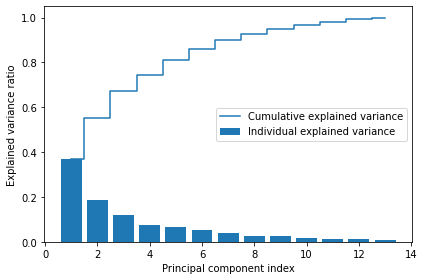

In [ ]:
#We only select subset of eigenvectors(PC) that contains most of the information(variance)
#We are interested on top eigenvectors so we need to order in decreasing eigenvalues.
tot=sum(eigen_vals) #somma totale dei valori eigen
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse = True)] #Variance explained ratios
cum_var_exp = np.cumsum(var_exp) #cumulative sum of explained variances.

#Graphics
import matplotlib.pyplot as plt
plt.bar(range(1,14), var_exp, align='center',label='Individual explained variance')
plt.step(range(1,14), cum_var_exp, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

As you can see, the first 2 component explain almost 60% of the variance in the dataset.

In [ ]:
#4) sorting
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(key=lambda k: k[0], reverse=True)
#5) selecting(this case k = 2) 6) construct w
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w) 
#13x2 dimensional projection matrix.

Matrix W:
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


In [ ]:
#7) use the projection matrix
X_train_std[0].dot(w)

array([2.38299011, 0.45458499])

In [ ]:
#transform entire 124x13 dimensional dataset to 2 pc
X_train_pca = X_train_std.dot(w)

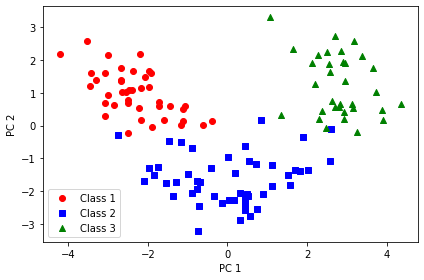

In [ ]:
#DataVisualization
colors = ['r', 'b', 'g']
markers = ['o', 's', '^']
for l, c, m in zip(np.unique(y_train), colors, markers):
  plt.scatter(X_train_pca[y_train==l, 0],
              X_train_pca[y_train==l, 1],
              c=c, label=f'Class {l}', marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

Keep in mind pca is unsupervised techniques that doesnt require any use of class label information

# PCA with SCIKIT

In [23]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
  # setup marker generator and color map
  markers = ('o', 's', '^', 'v', '<')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])
  # plot the decision surface
  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
  np.arange(x2_min, x2_max, resolution))
  lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  lab = lab.reshape(xx1.shape)
  plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())
  # plot class examples
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0],
                y=X[y == cl, 1],
                alpha=0.8,
                c=colors[idx],
                marker=markers[idx],
                label=f'Class {cl}',
                edgecolor='black')

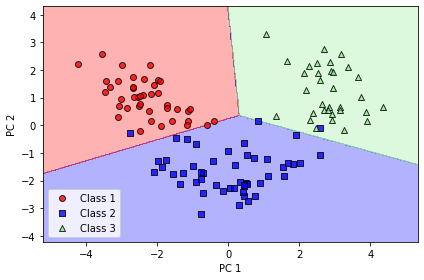

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
lr = LogisticRegression(multi_class='ovr',
                        random_state=1,
                        solver='lbfgs')
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()